In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [3]:
data=pd.read_csv('HR.csv')
print(data)
y=data['If_left']
data=data.drop('If_left',axis=1)
train_X,test_X,train_Y,test_Y=train_test_split(data,y,test_size=0.2,random_state=10)

       Satisfaction_level  Position  Salary  Length of servicey  \
0                    0.38         1       1                   3   
1                    0.80         1       2                   6   
2                    0.11         1       2                   4   
3                    0.72         1       1                   5   
4                    0.37         1       1                   3   
5                    0.41         1       1                   3   
6                    0.10         1       1                   4   
7                    0.92         1       1                   5   
8                    0.89         1       1                   5   
9                    0.42         1       1                   3   
10                   0.45         1       1                   3   
11                   0.11         1       1                   4   
12                   0.84         1       1                   5   
13                   0.41         1       1                   

In [4]:
transfer=MinMaxScaler()
train_X=transfer.fit_transform(train_X)
print(train_X)
print(train_X.shape)
test_X=transfer.transform(test_X)
print(test_X)
print(test_X.shape)

[[0.83516484 0.77777778 0.5        ... 0.76635514 0.4        0.        ]
 [0.74725275 1.         0.5        ... 0.42523364 0.         0.        ]
 [0.08791209 0.33333333 0.         ... 0.42990654 0.2        0.        ]
 ...
 [0.78021978 1.         0.         ... 0.65420561 0.2        1.        ]
 [0.96703297 0.33333333 0.5        ... 0.26168224 0.4        0.        ]
 [0.37362637 0.77777778 0.         ... 0.24766355 0.8        0.        ]]
(11999, 9)
[[0.61538462 0.         0.         ... 0.13551402 0.6        0.        ]
 [0.35164835 0.55555556 0.         ... 0.14953271 0.         0.        ]
 [0.38461538 0.         0.5        ... 0.13551402 0.2        0.        ]
 ...
 [0.13186813 1.         0.         ... 0.1588785  0.8        1.        ]
 [0.83516484 0.44444444 0.5        ... 0.21495327 0.4        0.        ]
 [0.54945055 1.         0.         ... 0.68691589 0.2        0.        ]]
(3000, 9)


In [5]:
pd.DataFrame(train_X).to_csv("X_train",index=False)

pd.DataFrame(test_X).to_csv("X_test",index=False)

pd.DataFrame(train_Y).to_csv("y_train",index=False)

pd.DataFrame(test_Y).to_csv("y_test",index=False)

In [6]:
max_acc,optm_k=0,0
accList=[]
krange=range(1,31)
for k in krange:
    neigh=KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_X,train_Y)
    acc=neigh.score(test_X,test_Y)
    accList.append(acc)
    if acc>max_acc:
        max_acc=acc
        optm_k=k
print("最优k值:{}，准确率：{:.8f}".format(optm_k,max_acc))


最优k值:1，准确率：0.96700000


In [7]:
import time

start_time = time.time()  # 记录开始时间

# 在这里插入你的代码
max_acc, optm_k = 0, 0
accList = []
krange = range(1, 31)
for k in krange:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_X, train_Y)
    acc = neigh.score(test_X, test_Y)
    accList.append(acc)
    if acc > max_acc:
        max_acc = acc
        optm_k = k

end_time = time.time()  # 记录结束时间

execution_time = end_time - start_time  # 计算代码执行时间
print("代码执行时间：{:.8f}秒".format(execution_time))


代码执行时间：4.81567883秒


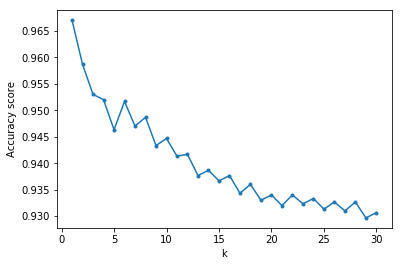

In [21]:
import matplotlib.pyplot as plt
plt.plot(krange,accList,marker='.')
plt.xlabel('k')
plt.ylabel('Accuracy score')
plt.show()

In [9]:
clf_neigh=KNeighborsClassifier(n_neighbors=1)
clf_neigh.fit(train_X,train_Y)
print('test score:',clf_neigh.score(test_X,test_Y))
predict_Y=clf_neigh.predict(test_X)
report=classification_report(test_Y,predict_Y,target_names=["留任","离职"])
print(report)


test score: 0.967
             precision    recall  f1-score   support

         留任       0.98      0.97      0.98      2266
         离职       0.92      0.94      0.93       734

avg / total       0.97      0.97      0.97      3000



In [11]:
data_4=pd.read_csv('SIMD_MPI_4.csv')
print(data_4)

     Unnamed: 0            P  PRE          O  ORI
0            0)  Prediction:  0.0  Original:  0.0
1           NaN          NaN  NaN        NaN  NaN
2            1)  Prediction:  0.0  Original:  1.0
3           NaN          NaN  NaN        NaN  NaN
4            2)  Prediction:  0.0  Original:  0.0
5           NaN          NaN  NaN        NaN  NaN
6            3)  Prediction:  1.0  Original:  0.0
7           NaN          NaN  NaN        NaN  NaN
8            4)  Prediction:  0.0  Original:  0.0
9           NaN          NaN  NaN        NaN  NaN
10           5)  Prediction:  0.0  Original:  1.0
11          NaN          NaN  NaN        NaN  NaN
12           6)  Prediction:  1.0  Original:  0.0
13          NaN          NaN  NaN        NaN  NaN
14           7)  Prediction:  0.0  Original:  0.0
15          NaN          NaN  NaN        NaN  NaN
16           8)  Prediction:  0.0  Original:  0.0
17          NaN          NaN  NaN        NaN  NaN
18           9)  Prediction:  0.0  Original:  0.0


In [13]:
selected_columns = ['PRE', 'ORI']
selected_data = data_4[selected_columns]

# 删除空白行
selected_data.dropna(inplace=True)

# 打印处理后的数据
print(selected_data)

      PRE  ORI
0     0.0  0.0
2     0.0  1.0
4     0.0  0.0
6     1.0  0.0
8     0.0  0.0
10    0.0  1.0
12    1.0  0.0
14    0.0  0.0
16    0.0  0.0
18    0.0  0.0
20    0.0  0.0
22    0.0  1.0
24    0.0  0.0
26    0.0  0.0
28    0.0  0.0
30    0.0  0.0
32    0.0  0.0
34    0.0  0.0
36    1.0  1.0
38    0.0  0.0
40    0.0  0.0
42    0.0  0.0
44    0.0  0.0
46    0.0  0.0
48    0.0  0.0
50    0.0  0.0
52    0.0  0.0
54    0.0  0.0
56    0.0  1.0
58    0.0  0.0
...   ...  ...
5940  0.0  0.0
5942  0.0  1.0
5944  1.0  1.0
5946  0.0  1.0
5948  0.0  0.0
5950  0.0  0.0
5952  0.0  0.0
5954  0.0  0.0
5956  1.0  0.0
5958  0.0  0.0
5960  0.0  0.0
5962  1.0  1.0
5964  1.0  0.0
5966  1.0  0.0
5968  1.0  1.0
5970  1.0  1.0
5972  1.0  1.0
5974  1.0  1.0
5976  0.0  0.0
5978  1.0  1.0
5980  0.0  1.0
5982  0.0  0.0
5984  1.0  0.0
5986  0.0  1.0
5988  0.0  0.0
5990  0.0  0.0
5992  0.0  0.0
5994  0.0  0.0
5996  0.0  0.0
5998  0.0  0.0

[3000 rows x 2 columns]


E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
duplicate_rows = selected_data[selected_data['PRE'] == selected_data['ORI']]

# 打印统计结果
print(duplicate_rows)

      PRE  ORI
0     0.0  0.0
4     0.0  0.0
8     0.0  0.0
14    0.0  0.0
16    0.0  0.0
18    0.0  0.0
20    0.0  0.0
24    0.0  0.0
26    0.0  0.0
28    0.0  0.0
30    0.0  0.0
32    0.0  0.0
34    0.0  0.0
36    1.0  1.0
38    0.0  0.0
40    0.0  0.0
42    0.0  0.0
44    0.0  0.0
46    0.0  0.0
48    0.0  0.0
50    0.0  0.0
52    0.0  0.0
54    0.0  0.0
58    0.0  0.0
60    0.0  0.0
62    0.0  0.0
64    0.0  0.0
68    0.0  0.0
70    0.0  0.0
74    0.0  0.0
...   ...  ...
5914  0.0  0.0
5918  0.0  0.0
5922  0.0  0.0
5926  0.0  0.0
5928  0.0  0.0
5930  0.0  0.0
5936  0.0  0.0
5938  0.0  0.0
5940  0.0  0.0
5944  1.0  1.0
5948  0.0  0.0
5950  0.0  0.0
5952  0.0  0.0
5954  0.0  0.0
5958  0.0  0.0
5960  0.0  0.0
5962  1.0  1.0
5968  1.0  1.0
5970  1.0  1.0
5972  1.0  1.0
5974  1.0  1.0
5976  0.0  0.0
5978  1.0  1.0
5982  0.0  0.0
5988  0.0  0.0
5990  0.0  0.0
5992  0.0  0.0
5994  0.0  0.0
5996  0.0  0.0
5998  0.0  0.0

[2022 rows x 2 columns]


In [15]:
2022/3000

0.674

In [17]:
data_1=pd.read_csv('SIMD_MPI_1.csv')
print(data_1)

     Unnamed: 0            P  PRE          O  ORI
0            0)  Prediction:  0.0  Original:  0.0
1           NaN          NaN  NaN        NaN  NaN
2            1)  Prediction:  0.0  Original:  1.0
3           NaN          NaN  NaN        NaN  NaN
4            2)  Prediction:  0.0  Original:  0.0
5           NaN          NaN  NaN        NaN  NaN
6            3)  Prediction:  0.0  Original:  0.0
7           NaN          NaN  NaN        NaN  NaN
8            4)  Prediction:  0.0  Original:  0.0
9           NaN          NaN  NaN        NaN  NaN
10           5)  Prediction:  0.0  Original:  1.0
11          NaN          NaN  NaN        NaN  NaN
12           6)  Prediction:  0.0  Original:  0.0
13          NaN          NaN  NaN        NaN  NaN
14           7)  Prediction:  0.0  Original:  0.0
15          NaN          NaN  NaN        NaN  NaN
16           8)  Prediction:  0.0  Original:  0.0
17          NaN          NaN  NaN        NaN  NaN
18           9)  Prediction:  0.0  Original:  0.0


In [18]:
selected_columns_1 = ['PRE', 'ORI']
selected_data_1= data_1[selected_columns]

# 删除空白行
selected_data_1.dropna(inplace=True)

# 打印处理后的数据
print(selected_data_1)

      PRE  ORI
0     0.0  0.0
2     0.0  1.0
4     0.0  0.0
6     0.0  0.0
8     0.0  0.0
10    0.0  1.0
12    0.0  0.0
14    0.0  0.0
16    0.0  0.0
18    0.0  0.0
20    0.0  0.0
22    1.0  1.0
24    1.0  0.0
26    0.0  0.0
28    0.0  0.0
30    0.0  0.0
32    0.0  0.0
34    0.0  0.0
36    0.0  1.0
38    0.0  0.0
40    0.0  0.0
42    0.0  0.0
44    0.0  0.0
46    0.0  0.0
48    0.0  0.0
50    0.0  0.0
52    0.0  0.0
54    0.0  0.0
56    0.0  1.0
58    0.0  0.0
...   ...  ...
5940  0.0  0.0
5942  0.0  1.0
5944  0.0  1.0
5946  0.0  1.0
5948  0.0  0.0
5950  0.0  0.0
5952  0.0  0.0
5954  0.0  0.0
5956  0.0  0.0
5958  0.0  0.0
5960  0.0  0.0
5962  0.0  1.0
5964  0.0  0.0
5966  0.0  0.0
5968  0.0  1.0
5970  0.0  1.0
5972  0.0  1.0
5974  0.0  1.0
5976  0.0  0.0
5978  0.0  1.0
5980  0.0  1.0
5982  0.0  0.0
5984  0.0  0.0
5986  0.0  1.0
5988  0.0  0.0
5990  0.0  0.0
5992  0.0  0.0
5994  0.0  0.0
5996  0.0  0.0
5998  0.0  0.0

[3000 rows x 2 columns]


E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [19]:
duplicate_rows_1 = selected_data_1[selected_data['PRE'] == selected_data['ORI']]

# 打印统计结果
print(duplicate_rows_1)

      PRE  ORI
0     0.0  0.0
4     0.0  0.0
8     0.0  0.0
14    0.0  0.0
16    0.0  0.0
18    0.0  0.0
20    0.0  0.0
24    1.0  0.0
26    0.0  0.0
28    0.0  0.0
30    0.0  0.0
32    0.0  0.0
34    0.0  0.0
36    0.0  1.0
38    0.0  0.0
40    0.0  0.0
42    0.0  0.0
44    0.0  0.0
46    0.0  0.0
48    0.0  0.0
50    0.0  0.0
52    0.0  0.0
54    0.0  0.0
58    0.0  0.0
60    0.0  0.0
62    0.0  0.0
64    0.0  0.0
68    0.0  0.0
70    0.0  0.0
74    0.0  0.0
...   ...  ...
5914  0.0  0.0
5918  0.0  0.0
5922  0.0  0.0
5926  0.0  0.0
5928  0.0  0.0
5930  0.0  0.0
5936  0.0  0.0
5938  0.0  0.0
5940  0.0  0.0
5944  0.0  1.0
5948  0.0  0.0
5950  0.0  0.0
5952  0.0  0.0
5954  0.0  0.0
5958  0.0  0.0
5960  0.0  0.0
5962  0.0  1.0
5968  0.0  1.0
5970  0.0  1.0
5972  0.0  1.0
5974  0.0  1.0
5976  0.0  0.0
5978  0.0  1.0
5982  0.0  0.0
5988  0.0  0.0
5990  0.0  0.0
5992  0.0  0.0
5994  0.0  0.0
5996  0.0  0.0
5998  0.0  0.0

[2022 rows x 2 columns]


In [20]:
2022/3000

0.674

In [24]:
data_4_n2=pd.read_csv('MPI4N2.csv')
print(data_4_n2)

             Unnamed: 0            P           PRE           O  ORI
0                    0)  Prediction:             0   Original:  0.0
1                   NaN          NaN           NaN         NaN  NaN
2                    1)  Prediction:             1   Original:  1.0
3                   NaN          NaN           NaN         NaN  NaN
4                    2)  Prediction:             0   Original:  0.0
5                   NaN          NaN           NaN         NaN  NaN
6                    3)  Prediction:             1   Original:  0.0
7                   NaN          NaN           NaN         NaN  NaN
8                    4)  Prediction:             0   Original:  0.0
9                   NaN          NaN           NaN         NaN  NaN
10                   5)  Prediction:             1   Original:  1.0
11                  NaN          NaN           NaN         NaN  NaN
12                   6)  Prediction:             1   Original:  0.0
13                  NaN          NaN           N

In [26]:
selected_columns_4N2 = ['PRE', 'ORI']
selected_data_4N2= data_4_n2[selected_columns_4N2]

# 删除空白行
selected_data_4N2.dropna(inplace=True)
print(selected_data_4N2)
# 打印处理后的数据

     PRE  ORI
0      0  0.0
2      1  1.0
4      0  0.0
6      1  0.0
8      0  0.0
10     1  1.0
12     1  0.0
14     0  0.0
16     0  0.0
18     0  0.0
20     0  0.0
22     0  1.0
24     0  0.0
26     1  0.0
28     0  0.0
30     0  0.0
32     1  0.0
34     1  0.0
36     1  1.0
38     0  0.0
40     0  0.0
42     0  0.0
44     0  0.0
46     0  0.0
48     0  0.0
50     0  0.0
52     0  0.0
54     1  0.0
56     1  1.0
58     1  0.0
...   ..  ...
5940   0  0.0
5942   0  1.0
5944   1  1.0
5946   0  1.0
5948   0  0.0
5950   0  0.0
5952   1  0.0
5954   0  0.0
5956   1  0.0
5958   0  0.0
5960   1  0.0
5962   1  1.0
5964   1  0.0
5966   1  0.0
5968   1  1.0
5970   1  1.0
5972   1  1.0
5974   1  1.0
5976   0  0.0
5978   1  1.0
5980   1  1.0
5982   1  0.0
5984   1  0.0
5986   0  1.0
5988   0  0.0
5990   0  0.0
5992   0  0.0
5994   0  0.0
5996   0  0.0
5998   0  0.0

[3000 rows x 2 columns]


E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
